In [1]:
# Essential Imports
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy import stats

# Import .py files
import acquire as ac
import prepare as pr
import explore as ex
import model as mo

# Sklearn imports
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import warnings
warnings.filterwarnings('ignore')
seed = 42


# Acquire Data

In [2]:
# acquire data
df = ac.wine_data()

# Prepare Data

In [3]:
# creating dummies for my scaled dataframe
dfs = pr.get_dummies(df,['type'])

# Split Data

In [4]:
# creating train, validate,test sets
train,validate,test = pr.train_val_test(df,'quality')

In [5]:
# creating scaled train, validate,test sets 
trains,validates,tests = pr.split_data(dfs,'quality')

# x and y split

In [6]:
# splitting the features from the target
x_train, y_train, x_validate, y_validate, x_test, y_test = pr.x_and_y(trains,validate,tests,'quality')

In [7]:
# splitting the features from the target on our scaled data
x_trains, y_train, x_validates, y_validate, x_tests, y_test = pr.x_and_y(trains,validates,tests,'quality')

# Scaled Data

In [8]:
# creating num cols
num_cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']

In [9]:
# scaling data bases on the numerical columns
x_trains, x_validates, x_tests = pr.scale_data(x_trains,x_validates, x_tests, num_cols)

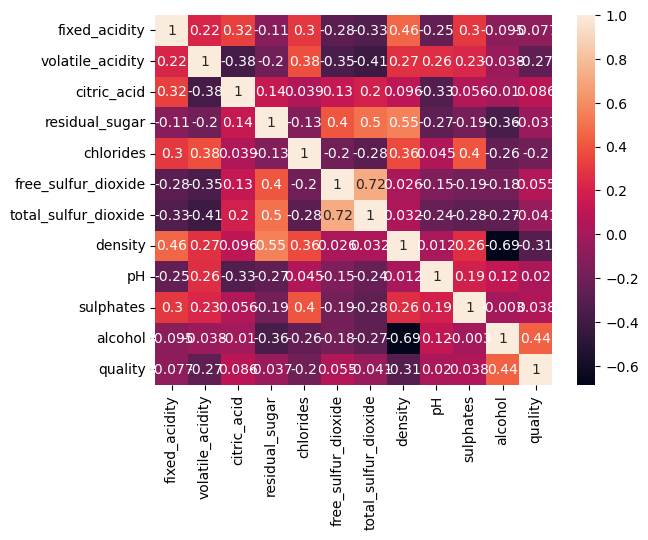

In [10]:
# function to call heatmap
mo.get_heatmap(df)

# What is the relationship between alcohol and quality?

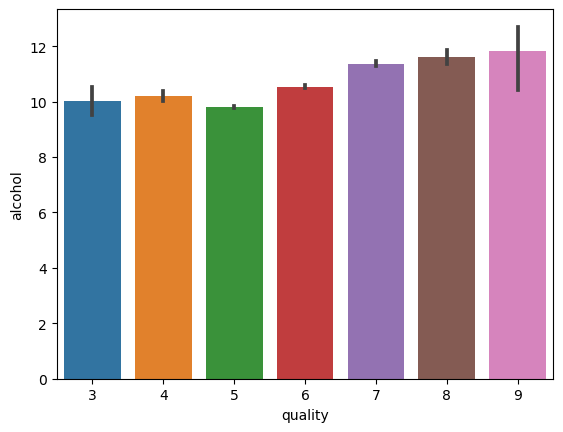

In [11]:
ex.viz_barplot(train, 'quality', 'alcohol')

In [12]:
ex.pearson_test(train,'alcohol','quality')

p is 0.0000000000, 0.4419210227831018
The pearson r test shows that there is a signficant relationship.


Takeaways:
Correlation table shows that alchol and quality has positive correlation of .44
quality of wine increases with increase of alcohol precent. wine with alcohol percent above 10 is considered 
good wine

## Does density play role in determining quality of wine?

In [13]:
# def viz_histplot(df, colx):
#     good= df[df['quality_bin']=='good']
#     average= df[df['quality_bin']=='average']
#     poor= df[df['quality_bin']=='poor']
    
#     sns.histplot(data=good, alpha=0.5, x=colx,label='good')
#     sns.histplot(data=average, alpha=0.2, x=colx,label='average')
#     sns.histplot(data=poor, alpha=0.5, x=colx,label='poor')
#     plt.legend()
#     plt.show()

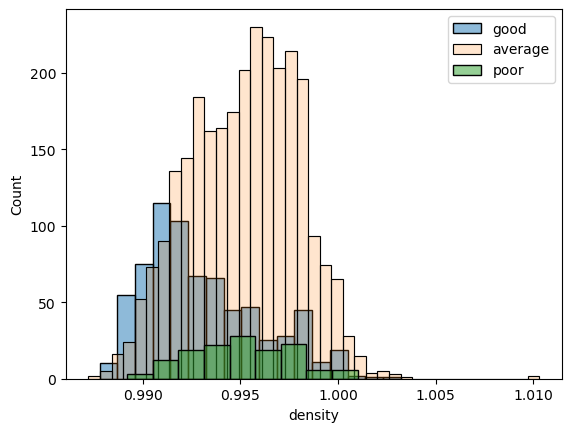

In [14]:
ex.viz_histplot(train, 'density')

#### Takeaways:
lower voltile_ acidity gives good wine. 

# Is the relationship between density and quality significant

<AxesSubplot:xlabel='density', ylabel='quality'>

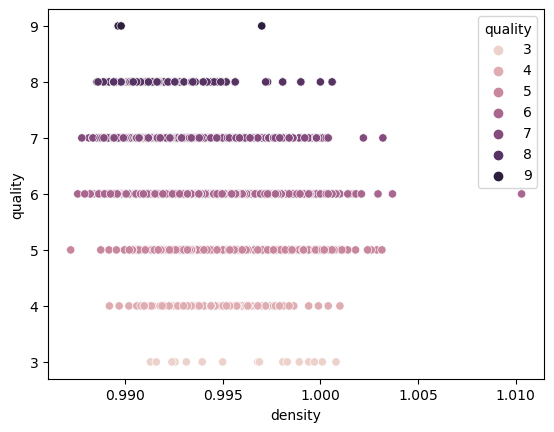

In [15]:
sns.scatterplot(data=train, x="density", y = 'quality',hue ='quality')  

<div class="alert alert-block alert-info">
<b>$Ha$:</b> There is no significant difference in the mean  
    
    
<b>$Ho$:</b> There is a significant difference in the mean  
</div>

In [16]:
# calling function to perform pearsons test
mo.pearson_test(train,'alcohol','quality')

p is 0.0000000000, 0.4419210227831018
The pearson r test shows that there is a signficant relationship.


In [17]:
# calling function to perform t test
mo.den_t_test(train)

p = 1.9141483024745924e-57, t = -16.276285258377136
Reject $H_{0}$?  True


# Is the relationship between volatile_acidity and quality significant?

<AxesSubplot:xlabel='volatile_acidity', ylabel='quality'>

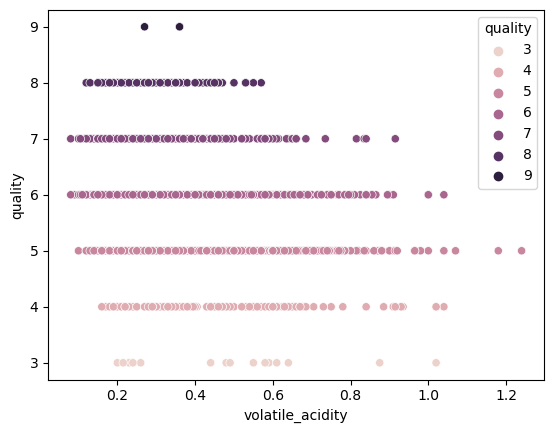

In [18]:
sns.scatterplot(data=train, x="volatile_acidity", y = 'quality',hue ='quality')  

<div class="alert alert-block alert-info">
<b>$Ha$:</b> There is no significant difference in the mean  
    
    
<b>$Ho$:</b> There is a significant difference in the mean  
</div>

In [19]:
# calling function to perform pearsons test
mo.pearson_test(train,'volatile_acidity','quality')

p is 0.0000000000, -0.2587959872859457
The pearson r test shows that there is a signficant relationship.


In [20]:
mo.vol_t_test(train)

p = 2.0796791836066002e-26, t = -10.746362824466681
Reject $H_{0}$?  True


 # Exploration Summary

* `alcohol`, `density`, and `volatile_acidity` have a correlation to the model while also can be linked to a significant mean difference

* `alcohol` has a .44 correlation, `density` has a .44 correlation, `volatile_acidity` has a .44 correlation, 

# Clustering

## `alcohol` and `density`

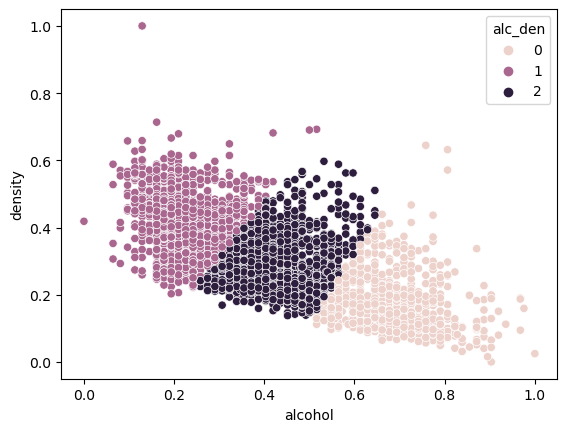

In [21]:
x_trains,x_validates,x_tests = mo.alc_den_clusters(x_trains,x_validates,x_tests)

## `density` and `residual_sugar`

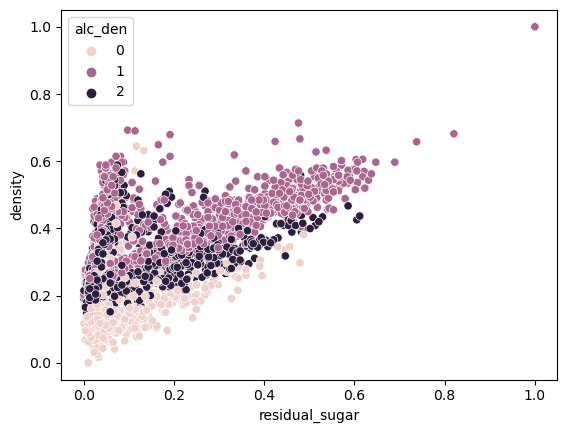

In [22]:
x_trains,x_validates,x_tests = mo.den_res_clusters(x_trains,x_validates,x_tests)

## `alochol` and `volatile_acidty`

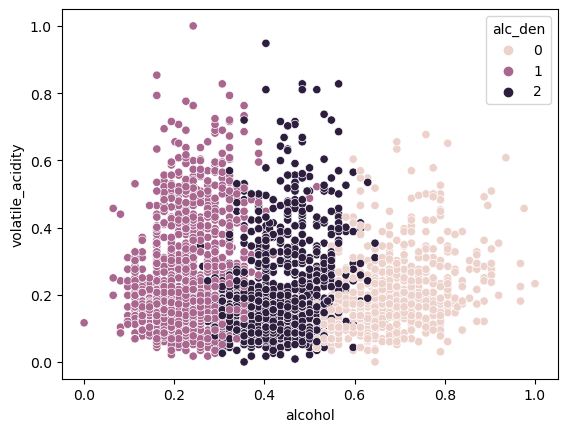

In [23]:
x_trains,x_validates,x_tests = mo.alc_vol_clusters(x_trains,x_validates,x_tests)

# Dummy Cluster

In [24]:
#x_trains = pr.get_dummies(x_trains,['alc_den','res_den','alc_vol'])

In [25]:
#x_validates = pr.get_dummies(x_validates,['alc_den','res_den','alc_vol'])

In [26]:
#x_tests = pr.get_dummies(x_tests,['alc_den','res_den','alc_vol'])

<div class="alert alert-block alert-warning">
<b>TakeAways:</b> The features that correlated to quality, are now clustered to other features that were highly correlated to them to capture this data
</div>

# Beating a Baseline

In [27]:
mo.get_baseline_accuracy(x_train, y_train)

Baseline accuracy: 0.43662359087159747


<div class="alert alert-block alert-warning">
<b>Baseline:</b> .44%

# modeling

<div class="alert alert-block alert-info">
<b>Notes:</b>   
    
* knn performed well  

* random forest performed well  

* logistic regression performed well  

* decision tree performed the best in terms of overfitting  

In [28]:
df1 = mo.decision_tree_loop(x_trains, x_validates, y_train, y_validate)
# df1

In [29]:
# list the validate accuracy on descending order
df1.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,max_depth,train_accuracy,validate_accuracy,difference
7,8,0.673907,0.554487,0.119420
6,7,0.642563,0.551923,0.090639
8,9,0.715425,0.547436,0.167989
5,6,0.611493,0.526923,0.084570
3,4,0.558427,0.525641,0.032786
1,2,0.529832,0.520513,0.009319
4,5,0.580973,0.519872,0.061102
0,1,0.496288,0.501923,-0.005635
2,3,0.539181,0.498718,0.040463


selected Max_Depth = 2

In [30]:
tree_train_acc, tree_train_validate_acc= mo.get_decision_tree(x_trains, x_validates, y_train, y_validate, 2)
tree_train_acc, tree_train_validate_acc

(0.5298322793511135, 0.5205128205128206)

In [31]:
df2 = mo.random_forest_tree_loop(x_trains, x_validates, y_train, y_validate)
# df2

In [32]:
# list the validate accuracy on descending order
df2.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(20)

,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.636538,0.363462
1,2,0.977179,0.634615,0.342564
3,4,0.866923,0.623718,0.243205
2,3,0.913940,0.622436,0.291504
4,5,0.830080,0.606410,0.223669
5,6,0.800385,0.602564,0.197821
6,7,0.767941,0.593590,0.174351
7,8,0.750619,0.590385,0.160234
8,9,0.729172,0.580769,0.148403
11,12,0.694803,0.580128,0.114675


selected min_samples = 22

In [33]:
random_train_acc, random_validate_acc= mo.get_random_forest(x_trains, x_validates, y_train, y_validate, 22)
random_train_acc, random_validate_acc

(0.6367885620016497, 0.5621794871794872)

In [34]:
df3 = mo.knn_loop(x_trains, x_validates, y_train, y_validate)
# df3

In [35]:
# list the validate accuracy on descending order
df3.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,n_neighbors,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.574359,0.425641
3,4,0.703327,0.537179,0.166147
6,7,0.656035,0.534615,0.121420
9,10,0.620566,0.532051,0.088515
18,19,0.590322,0.530128,0.060193
5,6,0.665384,0.529487,0.135896
19,20,0.587572,0.528846,0.058726
16,17,0.593621,0.528846,0.064775
7,8,0.636239,0.528205,0.108034
17,18,0.594996,0.527564,0.067432


neighbor = 19

In [36]:
knn_train_acc, knn_validate_acc= mo.get_knn(x_trains, x_validates, y_train, y_validate, 19)
knn_train_acc, knn_validate_acc

(0.5903216937036019, 0.5301282051282051)

In [37]:
df = mo.get_models_accuracy(x_trains, y_train, x_validates, y_validate, trains, validates)
df

,train_accuracy,validate_accuracy,difference
Decision_Tree(max_depth=2),0.529832,0.520513,0.009319
Random_Forest(min_samples_lead=22),0.636789,0.562179,0.074609
KNN (Neighours=19),0.590322,0.530128,0.060193


In [56]:
import matplotlib.ticker as mtick

def viz_models_accuracy(df ):
    
    plt.figure(figsize=(3,6))
    ax = df.drop(columns='difference').plot.bar(rot=80)
    ax.spines[['right', 'top']].set_visible(False)
    plt.title("Comparisons of Accuracy")
    plt.ylabel('Accuracy score')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))


<Figure size 300x600 with 0 Axes>

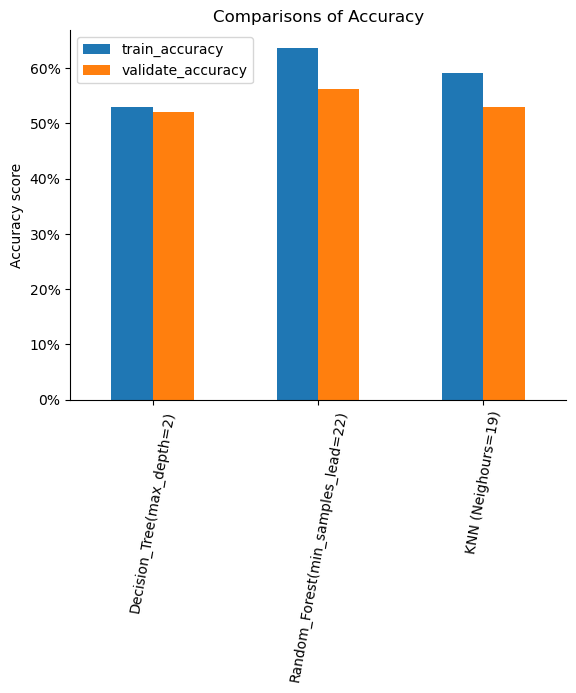

In [57]:
viz_models_accuracy(df)

# Evaluating on Test

In [44]:
# mo.get_decison_tree_test(x_train, x_test, y_train, y_test,2)

In [45]:
# mo.get_decison_tree_test(x_trains, x_tests, y_train, y_test,2)

In [42]:
mo.get_random_forest_test(x_train, x_test, y_train, y_test,22)

0.5769230769230769


In [43]:
mo.get_random_forest_test(x_trains, x_tests, y_train, y_test,22)

0.5676923076923077


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> Max Depth of 22 beats the baseline and shows no signs of overfitting</div>

# Conlusion

<div class="alert alert-block alert-success">
<b>Conclusion:</b> 
    
* conclude
</div>

# Recommendation

<div class="alert alert-block alert-success">
<b>Recommendation:</b> 
    
* We recommend to
</div>